In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set_style("whitegrid")

REFS:
    
https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac

# 1 . Data exploration

The dataset contains information about mall customers to analyze the segments or groups of clients that could be identified studying their personal data, spending behavior and incomes. Customer segmentation is very useful to explore the market and find groups of customers with similar properties. This dataset is a small dataset, contains data about 200 customers and features about the genre, age, incomes, and spending score.


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [4]:
# Renaming columns

df.columns = ['customerId', 'gender', 'age', 'annual_income', 'spending_score']

As you can see, the dataset contains numerical features except one: gender. We will check how many men and women contains de dataset:

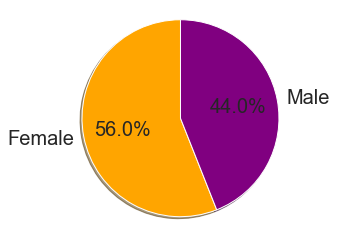

In [5]:
df_count_gender = df.groupby('gender').size()
df_count_gender = df_count_gender.reset_index()

df_count_gender.columns = ['gender', 'count']

#Pie chart 
labels = df_count_gender['gender'].values
sizes = df_count_gender['count'].values

colors = ['orange', 'purple']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops=dict(size=20))
ax1.axis('equal')  
plt.show()


# 2. Pair plot

Now, we evaluate the correlation plots of every pair of variables using a pair plot.


In [39]:
# Classic pair plot
# g = sns.pairplot(df, plot_kws = {'alpha': 0.6, 's': 60, 'edgecolor': 'black'}, height = 3)

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

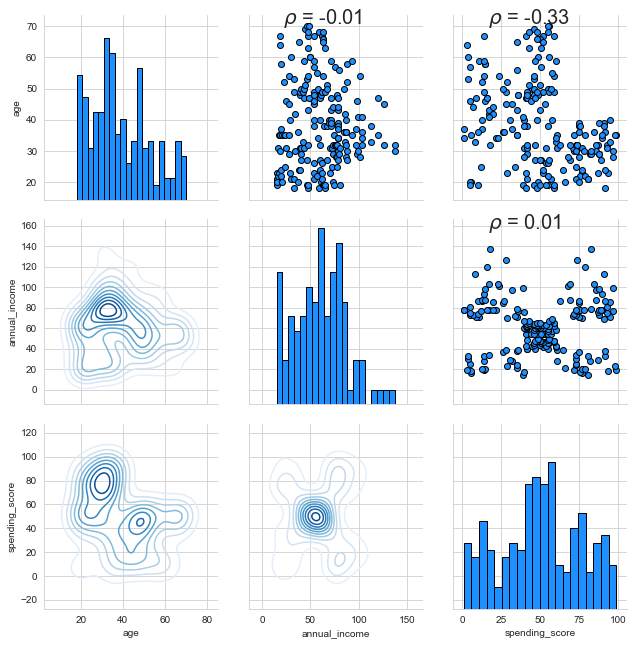

In [40]:
# REF: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
#      https://seaborn.pydata.org/generated/seaborn.PairGrid.html

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df, vars = ['age', 'annual_income', 'spending_score'], height = 3)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'dodgerblue', edgecolor='k')
grid = grid.map_upper(corr)
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 20, color = 'dodgerblue',  edgecolor = 'k')

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')

### Pair plot by gender

Now we evalate the correlation of variables for each gender

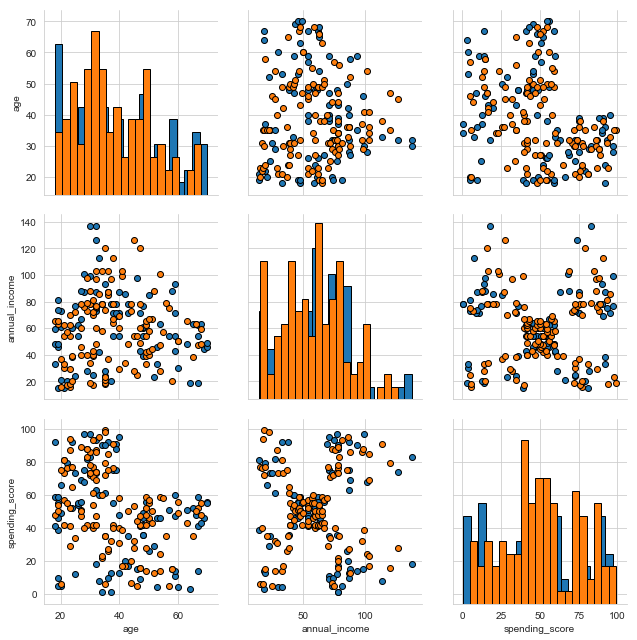

In [57]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=df, hue='gender', vars = ['age', 'annual_income', 'spending_score'], height = 3)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, edgecolor='k')

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 20,  edgecolor = 'k')

# Map a density plot to the lower triangle
grid = grid.map_lower(plt.scatter, edgecolor='k')

** NOTE 1: There is not correlation between the features. **

** NOTE 2: In the lower diagonal plot, that relates age and spending score, we observe two peaks. These peaks correspond to customers with ages betwen 20-40 years old and other group of peope with around 50 year old who manifiest different spending score. This could show some clues about how the data is grouped. **

** NOTE 3: In the plots (annual_income vs spending_score) we also see a dense group of points in the center of the plots. Peope with anual incombe among 45-55 seems to show similar spending score that is proportional to the anual income (40-60). **


## Matrix of correlation

In [50]:
df_corr = df.drop(['customerId', 'gender'], axis=1).corr()
df_corr.head()

,age,annual_income,spending_score
age,1.000000,-0.012398,-0.327227
annual_income,-0.012398,1.000000,0.009903
spending_score,-0.327227,0.009903,1.000000


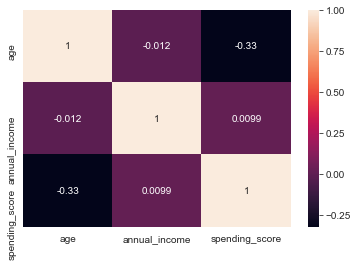

In [51]:
 ax = sns.heatmap(df_corr, annot=True)